In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 42

In [44]:
df = pd.read_csv("combined_dataset.csv")

In [45]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])

In [46]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.3, random_state=42)

# Initialize and fit TF-IDF vectorizer on training data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['Content'])
X_test_transformed = vectorizer.transform(X_test['Content']) 

In [47]:
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.89285714 0.88571429 0.88571429 0.82142857 0.85714286]
Average cross-validation score: 0.8686


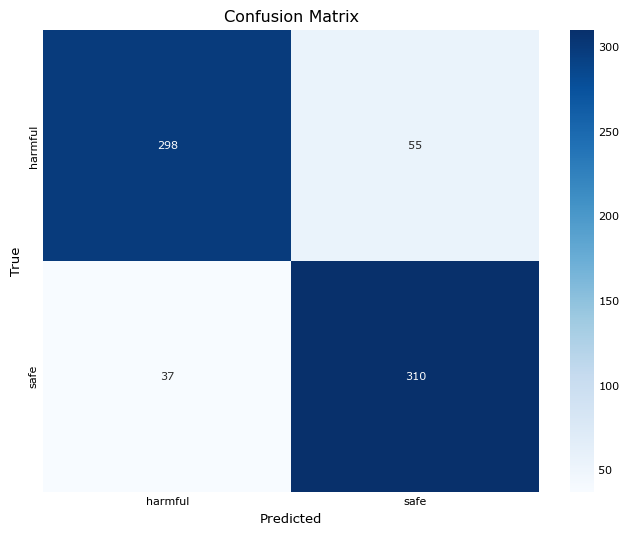

In [48]:

model.fit(X_train_transformed, y_train)
predictions = cross_val_predict(model, X_train_transformed, y_train, cv=5)

conf_matrix = confusion_matrix(y_train, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Classification Report
class_report = classification_report(y_train, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       353
           1       0.85      0.89      0.87       347

    accuracy                           0.87       700
   macro avg       0.87      0.87      0.87       700
weighted avg       0.87      0.87      0.87       700



In [50]:
# Get the number of rows in the sparse matrix
n = int(X_train_transformed.shape[0] * 0.8)

# Split the data into training and evaluation sets
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train_transformed[:n], X_train_transformed[n:], y_train[:n], y_train[n:]


In [ ]:
# eval_set = [(X_train_eval,y_train_eval)]
# # early_stopping_rounds = 10

# # This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
# xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.05,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds=10)
# xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.66775
[1]	validation_0-logloss:0.64373
[2]	validation_0-logloss:0.62219
[3]	validation_0-logloss:0.60261
[4]	validation_0-logloss:0.58471
[5]	validation_0-logloss:0.56836
[6]	validation_0-logloss:0.55335
[7]	validation_0-logloss:0.53970
[8]	validation_0-logloss:0.52719
[9]	validation_0-logloss:0.51660
[10]	validation_0-logloss:0.50558
[11]	validation_0-logloss:0.49560
[12]	validation_0-logloss:0.48751
[13]	validation_0-logloss:0.47974
[14]	validation_0-logloss:0.47279
[15]	validation_0-logloss:0.46639
[16]	validation_0-logloss:0.45978
[17]	validation_0-logloss:0.45444
[18]	validation_0-logloss:0.44876
[19]	validation_0-logloss:0.44474
[20]	validation_0-logloss:0.43995
[21]	validation_0-logloss:0.43573
[22]	validation_0-logloss:0.43212
[23]	validation_0-logloss:0.42816
[24]	validation_0-logloss:0.42406
[25]	validation_0-logloss:0.42062
[26]	validation_0-logloss:0.41705
[27]	validation_0-logloss:0.41376
[28]	validation_0-logloss:0.41074
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# xgb_model.best_iteration

166

In [ ]:
# print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train_transformed), y_train):.4f}")
# print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test_transformed), y_test):.4f}")

Metrics train:
	Accuracy score: 0.9386
Metrics test:
	Accuracy score: 0.8767


In [ ]:
# Get the confusion matrix
# cm = confusion_matrix(y_test, xgb_model.predict(X_test_transformed))
# print(cm)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

[[127  20]
 [ 17 136]]


In [ ]:
# print(classification_report(y_test, xgb_model.predict(X_test_transformed)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       147
           1       0.87      0.89      0.88       153

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [59]:
# Example URL to predict
url = "https://eezxodullgeunn.webflow.io"  # Example phishing URL

url_transformed = vectorizer.transform([url])

# Predict using the trained model
decision_prediction = model.predict(url_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

# Output the prediction (safe or phishing)
print(f"Random Forest prediction for: '{url}' -> {decision_predicted_class[0]}")

Random Forest prediction for: 'https://eezxodullgeunn.webflow.io' -> harmful


In [58]:
text = "u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020"

text_transformed = vectorizer.transform([text]) 

# Predict using the trained RandomForest model
decision_prediction = model.predict(text_transformed)

decision_predicted_class = label_encoder.inverse_transform(decision_prediction)

print(f"Random Forest prediction for: '{text}' -> {decision_predicted_class[0]}")

Random Forest prediction for: 'u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020' -> harmful
